# Reporting Forecasting Project
## EDA
### Kirill Yudaykin

---

#### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
import datetime
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#### Looking through files in the directory

In [2]:
print(listdir('oil_gas_train/')[1:])

['AMPY.xlsx', 'APA.xlsx', 'AR.xlsx', 'BATL.xlsx', 'BCEI.xlsx', 'BRY.xlsx', 'BSM.xlsx', 'CDEV.xlsx', 'CHK.xlsx', 'CLR.xlsx', 'CNX.xlsx', 'COG.xlsx', 'COP.xlsx', 'CPE.xlsx', 'CRBO.xlsx', 'CRC.xlsx', 'CRK.xlsx', 'DEN.xlsx', 'DVN.xlsx', 'EGY.xlsx', 'EOG.xlsx', 'EQT.xlsx', 'ESTE.xlsx', 'FANG.xlsx', 'GDP.xlsx', 'HES.xlsx', 'LONE.xlsx', 'LPI.xlsx', 'MCF.xlsx', 'MGY.xlsx', 'MNRL.xlsx', 'MRO.xlsx', 'MTDR.xlsx', 'MUR.xlsx', 'NOG.xlsx', 'OAS.xlsx', 'OVV.xlsx', 'PDCE.xlsx', 'PVAC.xlsx', 'PXD.xlsx', 'REI.xlsx', 'RRC.xlsx', 'SBOW.xlsx', 'SD.xlsx', 'SM.xlsx', 'SWN.xlsx', 'TALO.xlsx', 'TPL.xlsx', 'VNOM.xlsx', 'WLL.xlsx', 'WTI.xlsx', 'XEC.xlsx', 'XOG.xlsx']


#### Creating train and train_test datasets with essential features

In [3]:
data_train = list()
for file in [x for x in list(listdir('oil_gas_train/')) if x!='.ipynb_checkpoints']:
    df = pd.read_excel(f"oil_gas_train/{file}", sheet_name=file.rstrip('.xlsx'), header=[28], index_col=8)
    df = df.loc[:, list(map(lambda x: type(x) == datetime.datetime, list(df.columns)))]
    df = df.iloc[:95,:]
    df = df.drop(df.filter(regex='Consensus', axis=0).index, axis=0)
    df = df.drop(df[pd.isna(df.index)].index, axis=0).replace({'n.a.':np.nan}).drop_duplicates().astype(float)
    data_train.append((file.rstrip('.xlsx'), df))
data_train[5][1].head()

,2011-03-31,2011-06-30,2011-09-30,2011-12-31,2012-03-31,2012-06-30,2012-09-30,2012-12-31,2013-03-31,2013-06-30,...,2018-03-31,2018-06-30,2018-09-30,2018-12-31,2019-03-31,2019-06-30,2019-09-30,2019-12-31,2020-03-31,2020-06-30
INCOME STATEMENT,,,,,,,,,,,,,,,,,,,,,
Revenue,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,97.28400,65.982000,142.947008,280.345984,76.539000,170.066000,194.672000,118.128000,339.264992,33.453000
Revenue Growth (YoY),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.36154,NaN,NaN,NaN,-0.213242,1.577461,0.361847,-0.578635,3.432577,-0.803294
Cost of Revenue,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-73.96600,-32.917000,-32.364000,-85.610000,-92.772000,-84.575000,-89.937000,-103.717000,-92.255000,-90.483000
Gross Profit,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,23.31800,33.065000,110.583008,194.735984,-16.233000,85.491000,104.735000,14.411000,247.009992,-57.030000
Gross margin,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.23969,0.501122,0.773594,0.694627,-0.212088,0.502693,0.538008,0.121995,0.728074,-1.704780


In [4]:
data_train_test = list()
for file in list(listdir('oil_gas_train_test/')):
    df = pd.read_excel(f"oil_gas_train_test/{file}", sheet_name=file.rstrip('.xlsx'), header=[28], index_col=8)
    df = df.loc[:, list(map(lambda x: type(x) == datetime.datetime, list(df.columns)))]
    df = df.iloc[:95,:]
    df = df.drop(df.filter(regex='Consensus', axis=0).index, axis=0)
    df = df.drop(df[pd.isna(df.index)].index, axis=0).replace({'n.a.':np.nan}).drop_duplicates().astype(float)
    data_train_test.append((file.rstrip('.xlsx'), df))
data_train_test[5][1].head()

,2011-03-31,2011-06-30,2011-09-30,2011-12-31,2012-03-31,2012-06-30,2012-09-30,2012-12-31,2013-03-31,2013-06-30,...,2019-03-31,2019-06-30,2019-09-30,2019-12-31,2020-03-31,2020-06-30,2020-09-30,2020-12-31,2021-03-31,2021-06-30
INCOME STATEMENT,,,,,,,,,,,,,,,,,,,,,
Revenue,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,76.539000,170.066000,194.672000,118.128000,339.264992,33.453000,89.749000,61.366000,120.825000,105.832000
Revenue Growth (YoY),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.213242,1.577461,0.361847,-0.578635,3.432577,-0.803294,-0.538973,-0.480513,-0.643862,2.163603
Cost of Revenue,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-92.772000,-84.575000,-89.937000,-103.717000,-92.255000,-90.483000,-92.829000,-92.472000,-107.257000,-94.753000
Gross Profit,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-16.233000,85.491000,104.735000,14.411000,247.009992,-57.030000,-3.080000,-31.106000,13.568000,11.079000
Gross margin,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.212088,0.502693,0.538008,0.121995,0.728074,-1.704780,-0.034318,-0.506893,0.112295,0.104685


#### Looking at statistics of the first Income Statement (AMPY.xlsx)

In [5]:
AMPY = data_train[0][1]

In [6]:
AMPY.mean(axis=1)

INCOME STATEMENT
Revenue                                                79.759447
Revenue Growth (YoY)                                    0.115635
Cost of Revenue                                       -48.261395
Gross Profit                                           31.498052
Gross margin                                            0.348762
Other Operating Income                                  0.000000
Operating Expenses                                    -17.146474
Selling, General & Admin                              -10.059289
Other Operating Expenses                               -7.087184
Operating Income                                       14.351579
Operating Margin                                        0.139830
Non-Operating Income (Loss)                           -14.411789
Interest Expense, Net                                 -14.442816
Interest Expense                                      -14.457395
Interest Income                                         0.014579
Other No

In [7]:
AMPY.std(axis=1)

INCOME STATEMENT
Revenue                                                45.345609
Revenue Growth (YoY)                                    0.514697
Cost of Revenue                                        26.089922
Gross Profit                                           21.094827
Gross margin                                            0.154160
Other Operating Income                                  0.000000
Operating Expenses                                     12.105518
Selling, General & Admin                                8.668724
Other Operating Expenses                                8.688730
Operating Income                                       19.459591
Operating Margin                                        0.163923
Non-Operating Income (Loss)                            16.369014
Interest Expense, Net                                  16.104197
Interest Expense                                       16.108036
Interest Income                                         0.027555
Other No

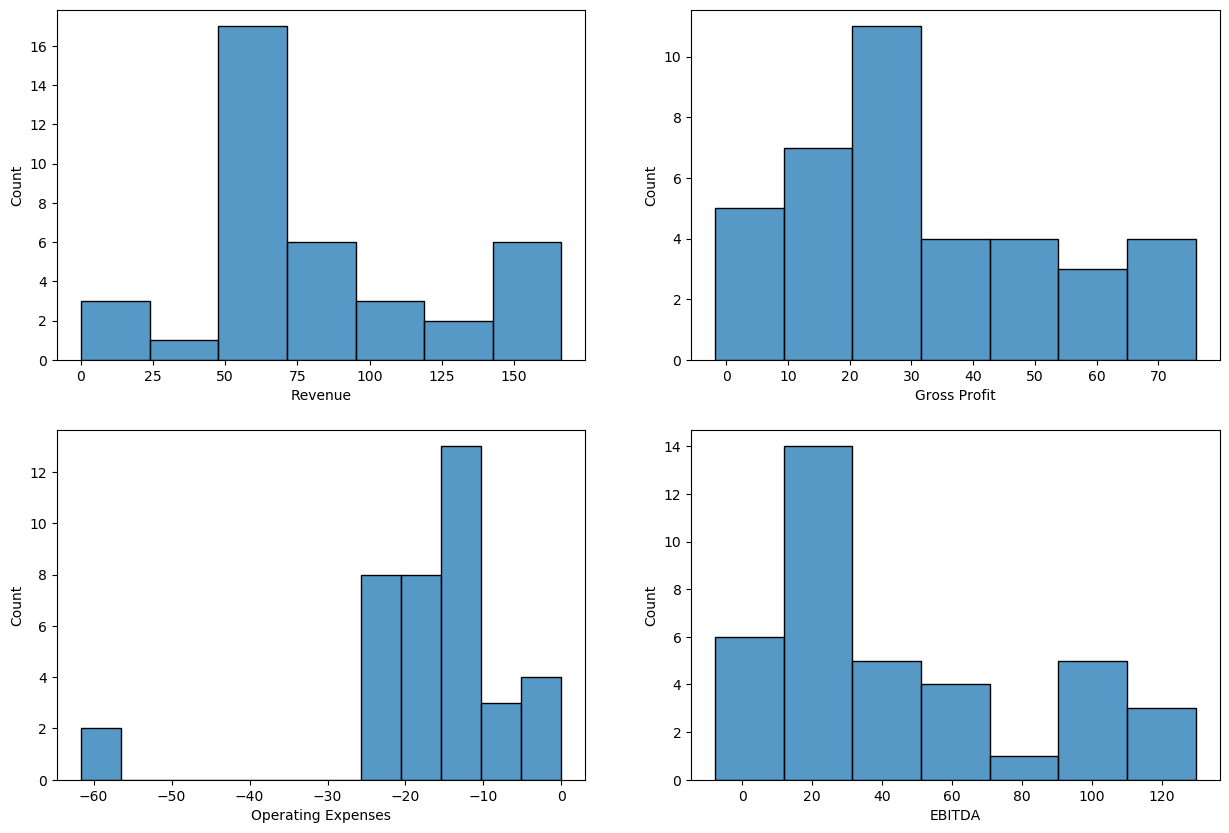

In [8]:
fig_1, ax_1 = plt.subplots(2,2,  figsize=(15, 10))

plt.subplot(ax_1[0,0])
sns.histplot(AMPY.loc['Revenue'])

plt.subplot(ax_1[0,1])
sns.histplot(AMPY.loc['Gross Profit'])

plt.subplot(ax_1[1,0])
sns.histplot(AMPY.loc['Operating Expenses'])

plt.subplot(ax_1[1,1])
sns.histplot(AMPY.loc['EBITDA'])

In [9]:
# Number of missing values
-AMPY.count(axis=1)+AMPY.shape[1]

INCOME STATEMENT
Revenue                                                0
Revenue Growth (YoY)                                   7
Cost of Revenue                                        0
Gross Profit                                           0
Gross margin                                           0
Other Operating Income                                 0
Operating Expenses                                     0
Selling, General & Admin                               0
Other Operating Expenses                               0
Operating Income                                       0
Operating Margin                                       0
Non-Operating Income (Loss)                            0
Interest Expense, Net                                  0
Interest Expense                                       0
Interest Income                                        0
Other Non-Op Income (Loss)                             0
Pretax Income                                          0
Income Taxes  

#### Looking at time-averaged values across all Income Statements

In [10]:
data_train[9][1].mean(axis=1)

INCOME STATEMENT
Revenue                                                809.067422
Revenue Growth (YoY)                                    -0.074078
Cost of Revenue                                       -508.128233
Gross Profit                                           305.521899
Gross margin                                             0.266023
Other Operating Income                                   0.000000
Operating Expenses                                     -45.733000
Selling, General & Admin                               -40.174395
Other Operating Expenses                                -5.558605
Operating Income                                       255.206185
Operating Margin                                         0.191738
Non-Operating Income (Loss)                            -80.353401
Interest Expense, Net                                  -11.724132
Interest Expense                                       -61.995868
Other Non-Op Income (Loss)                             -18.

In [11]:
statistics_means = pd.DataFrame()
for i in range(len(data_train)):
    statistics_means[f'{i}'] = data_train[i][1].mean(axis=1)

In [12]:
statistics_means.max(axis=1)

INCOME STATEMENT
Revenue                                               11246.842065
Revenue Growth (YoY)                                    760.398825
Cost of Revenue                                           0.000000
Gross Profit                                           2115.789366
Gross margin                                              0.795533
Other Operating Income                                    5.447368
Operating Expenses                                       -0.799745
Selling, General & Admin                                 -0.815947
Other Operating Expenses                                  2.487026
Operating Income                                       1602.178151
Operating Margin                                          0.793059
Non-Operating Income (Loss)                             175.623021
Interest Expense, Net                                     0.127536
Interest Expense                                         -0.154684
Interest Income                              

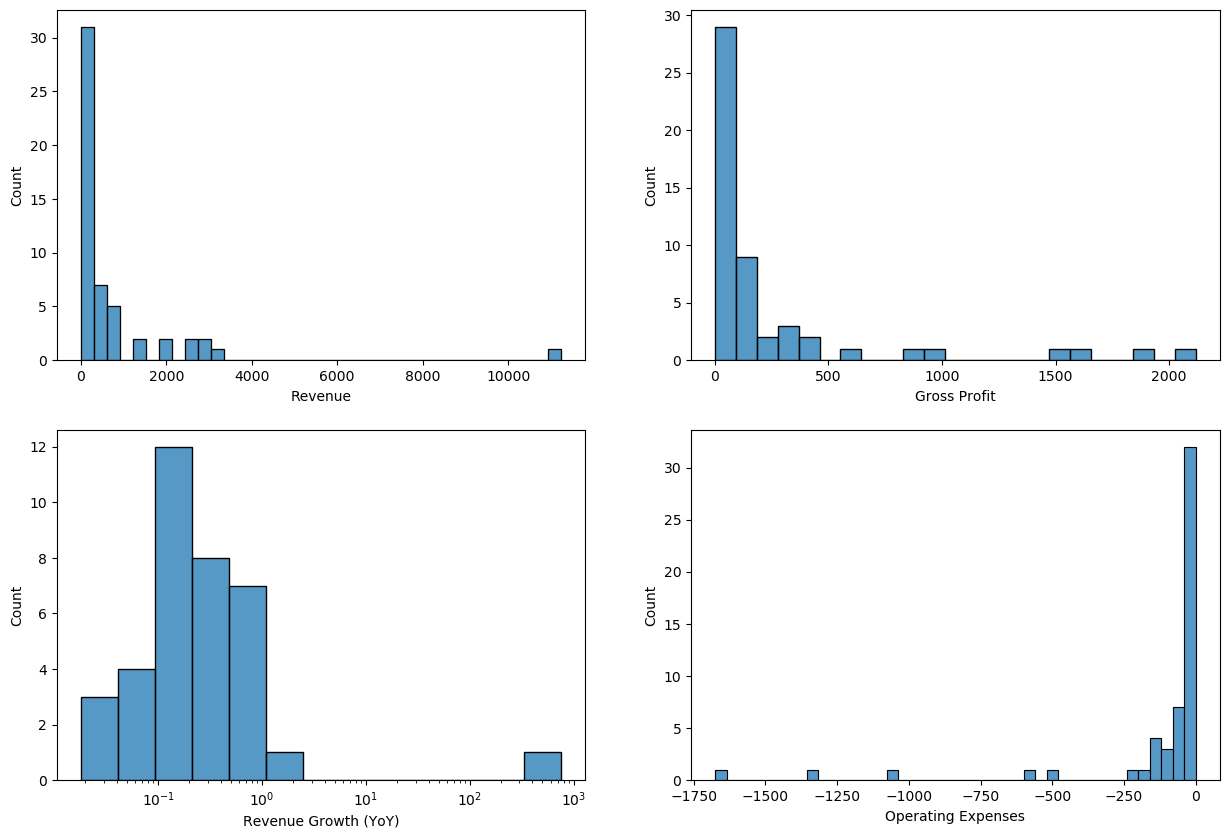

In [13]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

plt.subplot(ax[0,0])
sns.histplot(statistics_means.loc['Revenue'])

plt.subplot(ax[1,0])
sns.histplot(statistics_means.loc['Revenue Growth (YoY)'],log_scale=True)

plt.subplot(ax[0, 1])
sns.histplot(statistics_means.loc['Gross Profit'])

plt.subplot(ax[1, 1])
sns.histplot(statistics_means.loc['Operating Expenses'])
